<a href="https://colab.research.google.com/github/ferpatugo/Estatistica-Python/blob/main/Aula_Pr%C3%A1tica_03_ED_Python_Medidas_de_dispers%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Banco de Dados Iris em Python


# Carregando o banco

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dataset Iris do seaborn


In [4]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Amostra0: Sepal.Length

In [3]:
a0 = iris['sepal_length']

# Tamanho das sepalas

In [6]:
length_a0 = len(a0)

# Ordenado
sorted_a0 = np.sort(a0)

# Amplitude amostral
h0 = np.ptp(a0)  # peak to peak (max - min)

# Variancia amostral (ddof=1)
var0 = np.var(a0, ddof=1)

# Variancia populacional (ddof=0)
var0_pop = np.var(a0, ddof=0)

# Desvio padrao amostral
sd0 = np.std(a0, ddof=1)

# Media e intervalos +/- 2 desvios padrao
mean_a0 = np.mean(a0)
low_lim_a0 = mean_a0 - 2*sd0
high_lim_a0 = mean_a0 + 2*sd0

# Coeficiente de variacao
cv0 = sd0 / mean_a0 * 100

# Tamanho das pétalas

In [7]:
# Amostra1: Petal.Length
a1 = iris['petal_length']

# Ordenado
sorted_a1 = np.sort(a1)

# Amplitude amostral
h1 = np.ptp(a1)

# Variancia amostral
var1 = np.var(a1, ddof=1)

# Desvio padrao amostral
sd1 = np.std(a1, ddof=1)

# Media e intervalos +/- 2 desvios
mean_a1 = np.mean(a1)
low_lim_a1 = mean_a1 - 2*sd1
high_lim_a1 = mean_a1 + 2*sd1

# Coeficiente de variacao
cv1 = sd1 / mean_a1 * 100

In [8]:
# Consolidacao para Sepal.Length
dados_a0_consolidados = pd.DataFrame({
    'amplitude': [h0],
    'variancia': [var0],
    'desvio_padrao': [sd0],
    'media': [mean_a0],
    'coeficiente_variacao': [cv0]
})

# Consolidacao para Petal.Length
dados_a1_consolidados = pd.DataFrame({
    'amplitude': [h1],
    'variancia': [var1],
    'desvio_padrao': [sd1],
    'media': [mean_a1],
    'coeficiente_variacao': [cv1]
})

# Resumo comparativo (transposto)
consolidado_comparativo = pd.concat([dados_a0_consolidados.T, dados_a1_consolidados.T], axis=1)
consolidado_comparativo.columns = ['resumo_tamanho_Sepala', 'resumo_tamanho_Petala']

consolidado_comparativo


,resumo_tamanho_Sepala,resumo_tamanho_Petala
amplitude,3.600000,5.900000
variancia,0.685694,3.116278
desvio_padrao,0.828066,1.765298
media,5.843333,3.758000
coeficiente_variacao,14.171126,46.974407


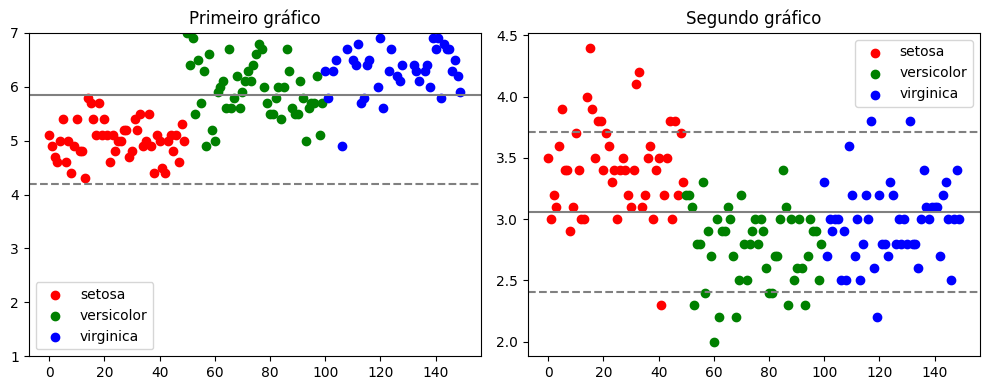

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

# Carrega o dataset iris, supondo a0 e a1 como colunas específicas (exemplo: comprimento e largura da sépala)
iris = datasets.load_iris(as_frame=True)
df = iris.frame
a0 = df['sepal length (cm)']
a1 = df['sepal width (cm)']

# Códigos de cor por espécie
species_unique = df['target'].unique()
colors = ['r', 'g', 'b']
species_map = dict(zip(species_unique, colors))

# Cria figura com 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Equivalente ao primeiro gráfico em R
for sp in species_unique:
    idx = df['target'] == sp
    axes[0].scatter(np.where(idx)[0], a0[idx], c=species_map[sp], label=iris.target_names[sp])

axes[0].axhline(y=a0.mean(), color='gray', linestyle='-')
axes[0].axhline(y=a0.mean() - 2*a0.std(), color='gray', linestyle='--')
axes[0].axhline(y=a0.mean() + 2*a0.std(), color='gray', linestyle='--')
axes[0].set_ylim([1, 7])
axes[0].legend()
axes[0].set_title('Primeiro gráfico')

# Plot 2: Equivalente ao segundo gráfico em R
for sp in species_unique:
    idx = df['target'] == sp
    axes[1].scatter(np.where(idx)[0], a1[idx], c=species_map[sp], label=iris.target_names[sp])

axes[1].axhline(y=a1.mean(), color='gray', linestyle='-')
axes[1].axhline(y=a1.mean() - 1.5*a1.std(), color='gray', linestyle='--')
axes[1].axhline(y=a1.mean() + 1.5*a1.std(), color='gray', linestyle='--')
axes[1].legend()
axes[1].set_title('Segundo gráfico')

plt.tight_layout()
plt.show()



# Resultados resumidos

In [9]:
print("Resumo Sepal.Length:\n", dados_a0_consolidados)
print("\nResumo Petal.Length:\n", dados_a1_consolidados)
print("\nResumo comparativo:\n", consolidado_comparativo)
print(f"\nMedia Sepal.Length: {mean_a0}, Media Petal.Length: {mean_a1}")

Resumo Sepal.Length:
    amplitude  variancia  desvio_padrao     media  coeficiente_variacao
0        3.6   0.685694       0.828066  5.843333             14.171126

Resumo Petal.Length:
    amplitude  variancia  desvio_padrao  media  coeficiente_variacao
0        5.9   3.116278       1.765298  3.758             46.974407

Resumo comparativo:
                       resumo_tamanho_Sepala  resumo_tamanho_Petala
amplitude                          3.600000               5.900000
variancia                          0.685694               3.116278
desvio_padrao                      0.828066               1.765298
media                              5.843333               3.758000
coeficiente_variacao              14.171126              46.974407

Media Sepal.Length: 5.843333333333334, Media Petal.Length: 3.7580000000000005


# Comparacao entre duas carteiras

In [33]:

a = np.array([50, 60, 70])
b = np.array([-20, 140])

mean_a = np.mean(a)
mean_b = np.mean(b)
median_a = np.median(a)
median_b = np.median(b)
sd_a = np.std(a, ddof=1)
sd_b = np.std(b, ddof=1)
cv_a = sd_a / mean_a * 100
cv_b = sd_b / mean_b * 100
mean_a
mean_b
median_a
median_b
sd_a
sd_b
cv_a
cv_b

np.float64(188.56180831641268)

In [34]:
print("\nComparacao entre carteiras:")
print(f"Media a: {mean_a}, Media b: {mean_b}")
print(f"Mediana a: {median_a}, Mediana b: {median_b}")
print(f"Desvio padrao a: {sd_a}, Desvio padrao b: {sd_b}")
print(f"Coeficiente de variacao a: {cv_a:.2f}%, b: {cv_b:.2f}%")


Comparacao entre carteiras:
Media a: 60.0, Media b: 60.0
Mediana a: 60.0, Mediana b: 60.0
Desvio padrao a: 10.0, Desvio padrao b: 113.13708498984761
Coeficiente de variacao a: 16.67%, b: 188.56%


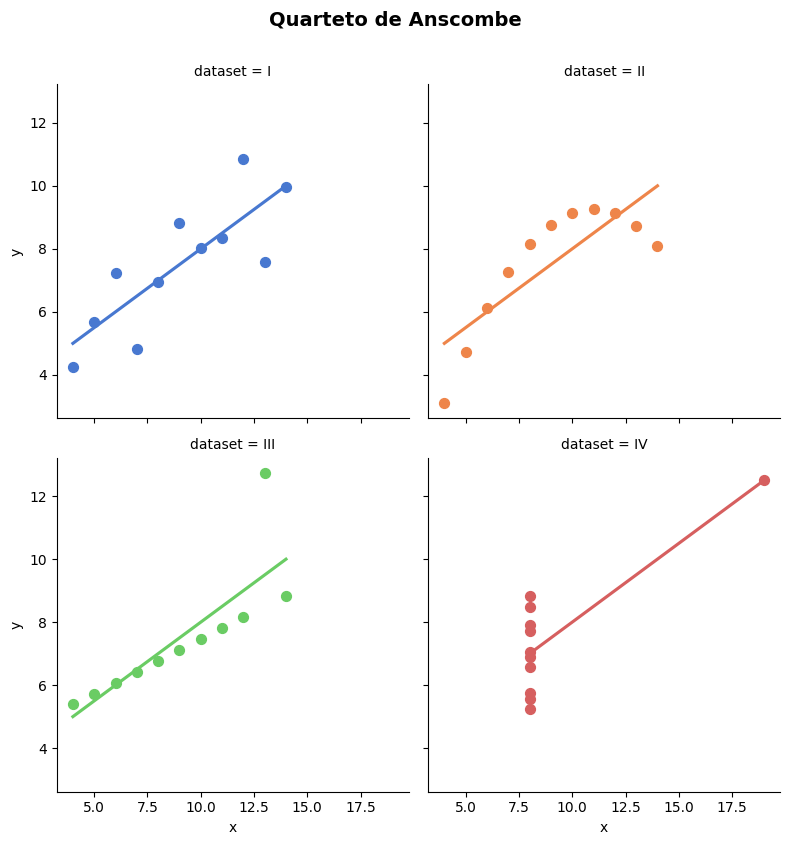

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.suptitle('Quarteto de Anscombe', fontsize=14, weight='bold', y=1.05)
plt.show()


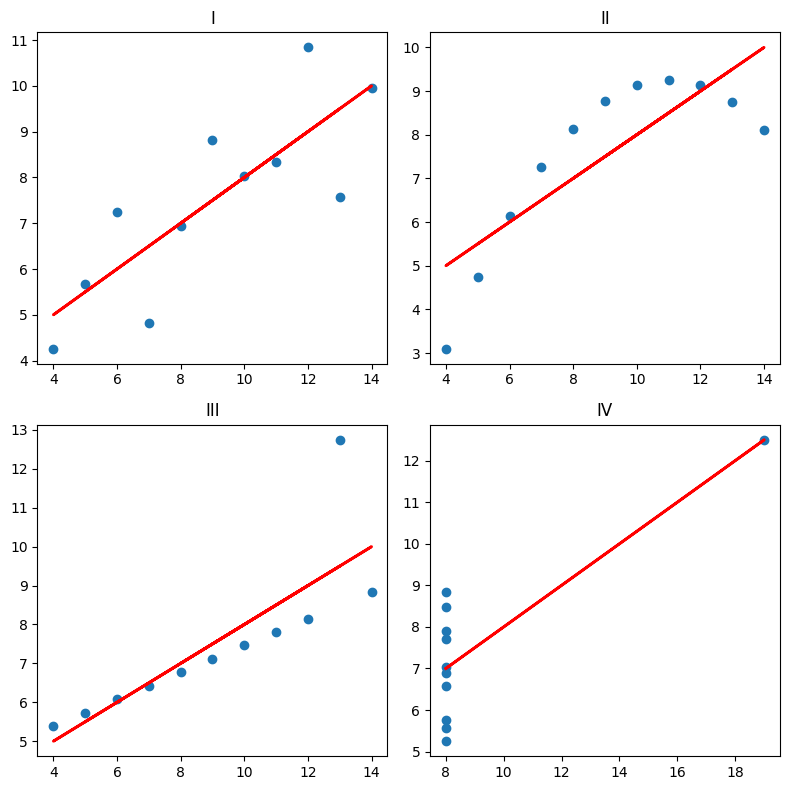

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

datasets = {'I': (x, y1), 'II': (x, y2), 'III': (x, y3), 'IV': (x4, y4)}

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for ax, (label, (xi, yi)) in zip(axs.flat, datasets.items()):
    ax.plot(xi, yi, 'o', label=label)
    m, b = np.polyfit(xi, yi, 1)
    ax.plot(xi, m*np.array(xi) + b, 'r-', lw=2)
    ax.set_title(label)
plt.tight_layout()
plt.show()
